<a href="https://colab.research.google.com/github/shivasaxena23/Experiments-DNN-Offloading/blob/main/Alpha_Non_Negligible_ExtremeVariableExpectationComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random
import math

In [3]:
def randComm(x,t=0):
    r = random.random()
    r = r + t*(1-r)
    return r*x

In [4]:
def randCommTwoWay(x,t=0):
    r = random.random()
    return x/2+r*(x)

In [5]:
def randCommTwoWayExt(x,t=0):
    r = random.random()
    return x/4+r*(3*x/2)

In [6]:
def randCommTwoWayExt2(x,t=0):
    r = random.random()
    return x/8+r*(7*x/4)

In [7]:
comm = 16.384
#comm = 14.90

One Way Communication and One Way Computation 

In [8]:
rho_avg = []
rho_avg_min = []
rho_worst = []
rho_worst_min = []

rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [9]:
checker_alpha = []
checker_comp = []
checker_comm = []

In [10]:
Topt_total = []
Talg_total = []

In [11]:
rho_matrix = []

In [ ]:
a = [1,2,3]
b = [2,3,4]
np.dot(a[3:],b[3:])
b[:1]


[2]

All Alpha conditions

In [12]:
for comp_t in range(20,400,100):
    for length in range(10,15,10):
        rho_worst_min = []
        rho_avg_min = []
        for comm in range(1,1200,40):
            #if comm%40 == 0:
            #  print(comm)
            rho_min = []
            for r in range(10000):
                current_comm = randComm(comm)
                current_comps = []
                current_comms = []
                Topt_vec = []
                Talg_vec = []
                #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
                #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
                #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
                current_comms_uniform = []
                current_comp_uniform = [1+randComm(comp_t) for i in range(length)]
                #current_alpha_uniform = [0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2]
                current_alpha_uniform = [random.random() for i in range(length)]
                min_alpha = min(current_alpha_uniform)
                
                #Get comm latencies
                for l in range(len(current_comp_uniform)):
                    if l == 0:
                        current_comms_uniform.append(comm)
                    else:
                        current_comms_uniform.append(randComm(current_comms_uniform[l-1]))
                current_comms_uniform.append(0)
                
                #ALG
                
                best_min = comm
                i = 0
                comms_counter = 1
                best_point_min = 0
                for l in current_comp_uniform:

                    current_comp = l
                    current_comm = current_comms_uniform[comms_counter]
                    
                    current_comps.append(current_comp)
                    current_comms.append(current_comm)

                    if (1-min_alpha)*sum(current_comps) + current_comm < best_min:
                        best_point_min = i+1
                        best_min = (1-min_alpha)*sum(current_comps) + current_comm

                    i = i + 1
                    comms_counter = comms_counter + 1
                
                if best_point_min != length and best_point_min != 0:
                    Talg_min = sum(current_comps[:best_point_min]) + current_comms[best_point_min-1] + np.dot(current_alpha_uniform[best_point_min:],current_comp_uniform[best_point_min:])
                elif best_point_min == 0:
                    Talg_min = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point_min:],current_comp_uniform[best_point_min:])
                elif best_point_min == length:
                    Talg_min = sum(current_comps[:best_point_min])
                    
                current_comps_temp = current_comps
                current_comms_temp = current_comms
                
                alg_best_point = best_point_min
                
                #OPT
                
                current_comps = []
                current_comms = []
                
                best = current_comms_uniform[0] + np.dot(current_alpha_uniform,current_comp_uniform)
                i = 0
                comms_counter = 1
                best_point = 0
                for l in current_comp_uniform:

                        
                    current_comp = l
                    current_comm = current_comms_uniform[comms_counter]
                    
                    current_comps.append(current_comp)
                    current_comms.append(current_comm)
                    
                    if sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:]) < best:
                        best_point = i+1
                        best = sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:])
                
                    i = i + 1
                    comms_counter = comms_counter + 1
                
                if best_point != length and best_point != 0:
                    Topt = sum(current_comps[:best_point]) + current_comms[best_point-1] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
                elif best_point == 0:
                    Topt = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
                elif best_point == length:
                    Topt = sum(current_comps[:best_point])
                
                opt_best_point = best_point
                
                if current_comps != current_comps_temp:
                    print(current_comps,current_comps_temp)
                
                if current_comms != current_comms_temp:
                    print(current_comms,current_comms_temp)
                
                if opt_best_point < alg_best_point:
                    print ("failed point",opt_best_point,alg_best_point)
                
                if Talg_min < Topt:
                    print ("failed makespan",Topt,Talg_min,opt_best_point,alg_best_point)
                    checker_alpha.append(current_alpha_uniform)
                    checker_comp.append(current_comp_uniform)
                    checker_comm.append(current_comms_uniform)
                
                if (Talg_min/Topt) > 2:
                    print ("failed proof",Topt,Talg_min,opt_best_point,alg_best_point)
                
                rho_min.append(Talg_min/Topt)
                '''
                Topt_vec.append(Topt)
                Talg_vec.append(Talg_min)
                #print(Talg,Topt,i,comm,best)
                '''
                
            rho_worst_min.append(np.max(rho_min))
            rho_avg_min.append(np.mean(rho_min))

            '''
            rho_avg.append(np.mean(rho))
            rho_median.append(np.median(rho))
            rho_60.append(np.percentile(rho,60))
            rho_70.append(np.percentile(rho,70))
            rho_80.append(np.percentile(rho,80))
            Topt_total.append(np.mean(Topt_vec))
            Talg_total.append(np.mean(Talg_vec))
            '''
        rho_matrix.append(rho_avg_min)

In [13]:
np.array(rho_matrix).shape

(4, 30)

In [14]:
with open('Alpha-Experiment-Non_Negligible-ExtremeComp.npy', 'wb') as f:
  np.save(f,np.array(rho_matrix))

In [15]:
with open('Alpha-Experiment-Non_Negligible-ExtremeComp.npy', 'rb') as f:
  matrix = np.load(f)

In [16]:
matrix.shape

(4, 30)

Same DNN Length different Computation Range

Text(0, 0.5, 'Competitive Ratio')

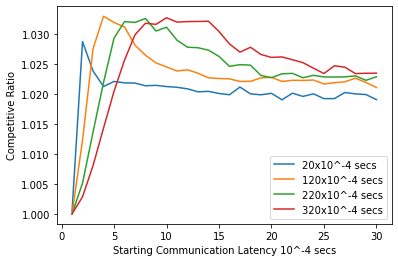

In [17]:
#Layers : 10
plt.plot(range(1,31),rho_matrix[0],label="20x10^-4 secs")
plt.plot(range(1,31),rho_matrix[1],label="120x10^-4 secs")
plt.plot(range(1,31),rho_matrix[2],label="220x10^-4 secs")
plt.plot(range(1,31),rho_matrix[3],label="320x10^-4 secs")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


IndexError: ignored

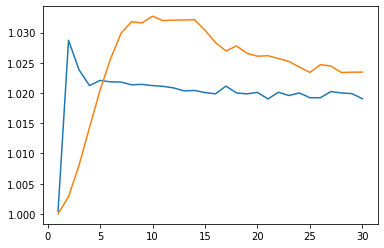

In [18]:
#5 Layers
plt.plot(range(1,31),rho_matrix[0],label="20x10^-4s")
plt.plot(range(1,31),rho_matrix[3],label="60x10^-4s")
plt.plot(range(1,31),rho_matrix[6],label="100x10^-4s")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Same Range of Computation Latencies but different Expectation

In [19]:
rho_avg = []
rho_avg_min = []
rho_worst = []
rho_worst_min = []

rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [20]:
checker_alpha = []
checker_comp = []
checker_comm = []

In [21]:
Topt_total = []
Talg_total = []

In [22]:
rho_matrix = []

In [23]:
a = [1,2,3]
b = [2,3,4]
np.dot(a[3:],b[3:])
b[:1]


[2]

All Alpha conditions

In [24]:
for comp_t in range(20,400,80):
    for length in range(10,15,10):
        rho_worst_min = []
        rho_avg_min = []
        for comm in range(1,1200,40):
            #if comm%40 == 0:
            #  print(comm)
            rho_min = []
            for r in range(10000):
                current_comm = randComm(comm)
                current_comps = []
                current_comms = []
                Topt_vec = []
                Talg_vec = []
                #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
                #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
                #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
                current_comms_uniform = []
                current_comp_uniform = [comp_t+randComm(20) for i in range(length)]
                #current_alpha_uniform = [0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2]
                current_alpha_uniform = [random.random() for i in range(length)]
                min_alpha = min(current_alpha_uniform)
                
                #Get comm latencies
                for l in range(len(current_comp_uniform)):
                    if l == 0:
                        current_comms_uniform.append(comm)
                    else:
                        current_comms_uniform.append(randComm(current_comms_uniform[l-1]))
                current_comms_uniform.append(0)
                
                #ALG
                
                best_min = comm
                i = 0
                comms_counter = 1
                best_point_min = 0
                for l in current_comp_uniform:

                    current_comp = l
                    current_comm = current_comms_uniform[comms_counter]
                    
                    current_comps.append(current_comp)
                    current_comms.append(current_comm)

                    if (1-min_alpha)*sum(current_comps) + current_comm < best_min:
                        best_point_min = i+1
                        best_min = (1-min_alpha)*sum(current_comps) + current_comm

                    i = i + 1
                    comms_counter = comms_counter + 1
                
                if best_point_min != length and best_point_min != 0:
                    Talg_min = sum(current_comps[:best_point_min]) + current_comms[best_point_min-1] + np.dot(current_alpha_uniform[best_point_min:],current_comp_uniform[best_point_min:])
                elif best_point_min == 0:
                    Talg_min = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point_min:],current_comp_uniform[best_point_min:])
                elif best_point_min == length:
                    Talg_min = sum(current_comps[:best_point_min])
                    
                current_comps_temp = current_comps
                current_comms_temp = current_comms
                
                alg_best_point = best_point_min
                
                #OPT
                
                current_comps = []
                current_comms = []
                
                best = current_comms_uniform[0] + np.dot(current_alpha_uniform,current_comp_uniform)
                i = 0
                comms_counter = 1
                best_point = 0
                for l in current_comp_uniform:

                        
                    current_comp = l
                    current_comm = current_comms_uniform[comms_counter]
                    
                    current_comps.append(current_comp)
                    current_comms.append(current_comm)
                    
                    if sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:]) < best:
                        best_point = i+1
                        best = sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:])
                
                    i = i + 1
                    comms_counter = comms_counter + 1
                
                if best_point != length and best_point != 0:
                    Topt = sum(current_comps[:best_point]) + current_comms[best_point-1] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
                elif best_point == 0:
                    Topt = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
                elif best_point == length:
                    Topt = sum(current_comps[:best_point])
                
                opt_best_point = best_point
                
                if current_comps != current_comps_temp:
                    print(current_comps,current_comps_temp)
                
                if current_comms != current_comms_temp:
                    print(current_comms,current_comms_temp)
                
                if opt_best_point < alg_best_point:
                    print ("failed point",opt_best_point,alg_best_point)
                
                if Talg_min < Topt:
                    print ("failed makespan",Topt,Talg_min,opt_best_point,alg_best_point)
                    checker_alpha.append(current_alpha_uniform)
                    checker_comp.append(current_comp_uniform)
                    checker_comm.append(current_comms_uniform)
                
                if (Talg_min/Topt) > 2:
                    print ("failed proof",Topt,Talg_min,opt_best_point,alg_best_point)
                
                rho_min.append(Talg_min/Topt)
                '''
                Topt_vec.append(Topt)
                Talg_vec.append(Talg_min)
                #print(Talg,Topt,i,comm,best)
                '''
                
            rho_worst_min.append(np.max(rho_min))
            rho_avg_min.append(np.mean(rho_min))

            '''
            rho_avg.append(np.mean(rho))
            rho_median.append(np.median(rho))
            rho_60.append(np.percentile(rho,60))
            rho_70.append(np.percentile(rho,70))
            rho_80.append(np.percentile(rho,80))
            Topt_total.append(np.mean(Topt_vec))
            Talg_total.append(np.mean(Talg_vec))
            '''
        rho_matrix.append(rho_avg_min)

In [25]:
np.array(rho_matrix).shape

(5, 30)

In [26]:
with open('Alpha-Experiment-Non_Negligible-ExtremeCompVariableExpectations.npy', 'wb') as f:
  np.save(f,np.array(rho_matrix))

In [27]:
with open('Alpha-Experiment-Non_Negligible-ExtremeCompVariableExpectations.npy', 'rb') as f:
  matrix = np.load(f)

In [28]:
matrix.shape

(5, 30)

Same DNN Length different Expectation of Computation Range

Text(0, 0.5, 'Competitive Ratio')

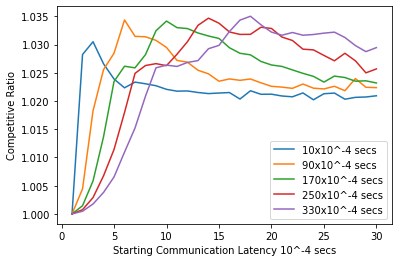

In [31]:
#Layers : 10
plt.plot(range(1,31),rho_matrix[0],label="10x10^-4 secs")
plt.plot(range(1,31),rho_matrix[1],label="90x10^-4 secs")
plt.plot(range(1,31),rho_matrix[2],label="170x10^-4 secs")
plt.plot(range(1,31),rho_matrix[3],label="250x10^-4 secs")
plt.plot(range(1,31),rho_matrix[4],label="330x10^-4 secs")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


IndexError: ignored

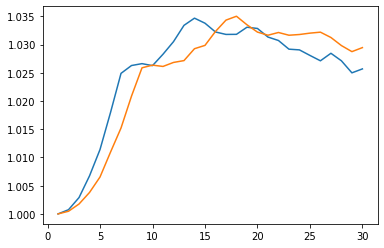

In [30]:
#Computation : 60
plt.plot(range(1,31),rho_matrix[3],label="5 Layers")
plt.plot(range(1,31),rho_matrix[4],label="15 Layers")
plt.plot(range(1,31),rho_matrix[5],label="25 Layers")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Text(0, 0.5, 'Competitive Ratio')

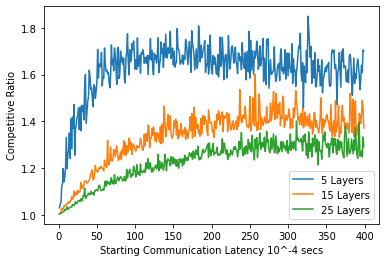

In [ ]:
#Computation : 100
plt.plot(range(1,31),rho_matrix[6],label="5 Layers")
plt.plot(range(1,31),rho_matrix[7],label="15 Layers")
plt.plot(range(1,31),rho_matrix[8],label="25 Layers")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Same DNN Length different Computation Range

Text(0, 0.5, 'Competitive Ratio')

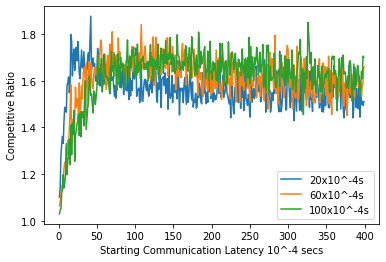

In [ ]:
#5 Layers
plt.plot(range(1,31),rho_matrix[0],label="20x10^-4s")
plt.plot(range(1,31),rho_matrix[3],label="60x10^-4s")
plt.plot(range(1,31),rho_matrix[6],label="100x10^-4s")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Text(0, 0.5, 'Competitive Ratio')

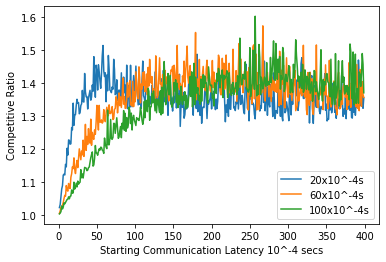

In [ ]:
#15 Layers
plt.plot(range(1,31),rho_matrix[1],label="20x10^-4s")
plt.plot(range(1,31),rho_matrix[4],label="60x10^-4s")
plt.plot(range(1,31),rho_matrix[7],label="100x10^-4s")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Text(0, 0.5, 'Competitive Ratio')

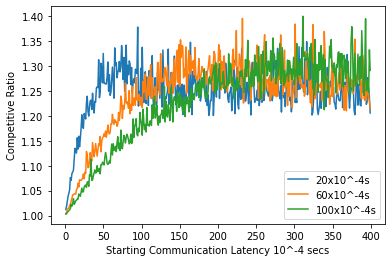

In [ ]:
#25 Layers
plt.plot(range(1,31),rho_matrix[2],label="20x10^-4s")
plt.plot(range(1,31),rho_matrix[5],label="60x10^-4s")
plt.plot(range(1,31),rho_matrix[8],label="100x10^-4s")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


In [ ]:
for i in rho_matrix:
  print(np.max(i))

1.8035045335132347
1.6619875242219486
1.5707500653705202
1.4818085280180802
1.4540021875100209
